In [3]:
#Importing all the libraries needed

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

In [4]:
# Importing the stock data and storing it in a dataframe

import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

RawStockData = pd.DataFrame(json_data)
bna_data = RawStockData[RawStockData['Stock_name'] == 'BNA']
bna_data = bna_data.sort_values(by='Date')
bna_data.reset_index(inplace=True)
columnsToExclude = ['Code_isin','index','Date' , 'Adj_low' , 'Adj_High' , 'Volume','Stock_name']
bna_data = bna_data.drop(columns=columnsToExclude)
print(bna_data)

      Adj_Close
0        11.173
1        11.129
2        11.349
3        11.283
4        11.305
...         ...
2684      7.340
2685      7.320
2686      7.310
2687      7.320
2688      7.320

[2689 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

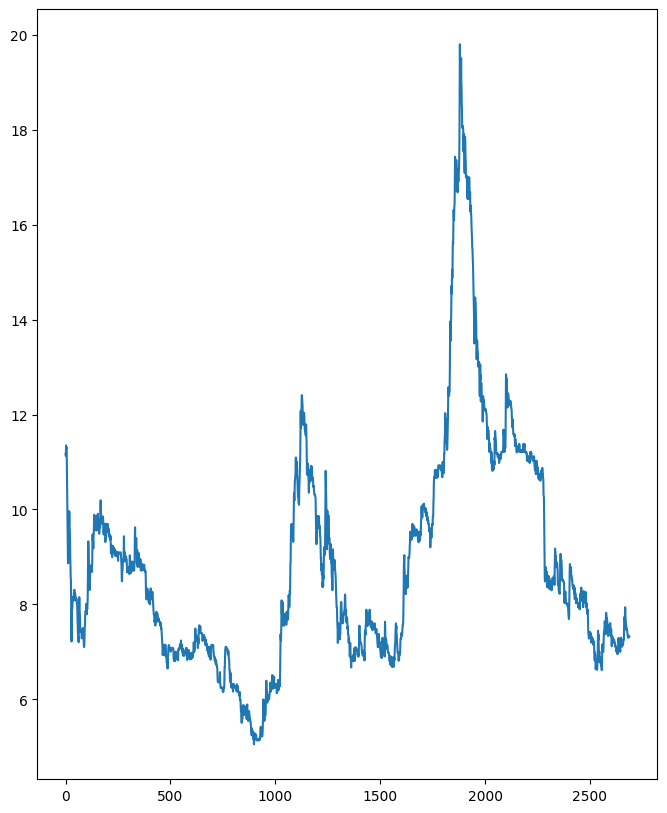

In [5]:
plt.figure(figsize=(8,10))
plt.plot(bna_data)
plt.show

In [5]:
train_data = bna_data[:-100]
test_data = bna_data[-100:]
train_data.shape , test_data.shape


((2589, 1), (100, 1))

In [6]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [7]:
train_data_scale = scaler.fit_transform(train_data)
base_days = 100 

x = []
y = []

for i in range(base_days , train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

x, y = np.array(x), np.array(y)

x = np.reshape(x , (x.shape[0],x.shape[1],1))

In [8]:
from keras.layers import Dense,Dropout, LSTM 
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences=True,
          input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Draysis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

model.fit(x,y, epochs = 50 , verbose = 1)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 0.0337
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0051
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0047
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0034
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0036
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0029
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0028
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0028
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0034
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0022
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0023
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0024
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0025
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0020
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step -

In [11]:
test_data = pd.concat((train_data.tail(100), test_data) , ignore_index = True)

In [12]:
test_data_scale = scaler.fit_transform(test_data)

x = []
y = []

for i in range(base_days , test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

x, y = np.array(x), np.array(y)

x = np.reshape(x , (x.shape[0],x.shape[1],1))

In [16]:
prediction = model.predict(x)

prediction = scaler.inverse_transform(prediction)
evaluation = model.evaluate(x, y)

loss = evaluation if isinstance(evaluation, float) else evaluation[0]
print('The model loss is:', loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0214
The model loss is: 0.038352880626916885


In [17]:

m = y  
z = []
future_days = 7
inter = None  
for i in range(base_days, len(m) + future_days):
    m = m.reshape(-1, 1)
    inter = [m[-base_days:, 0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1], 1))
    pred = model.predict(inter)
    m = np.append(m, pred)
    z = np.append(z, pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [18]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))
z

array([[10.55171812],
       [10.66796451],
       [10.69196792],
       [10.6515404 ],
       [10.57685992],
       [10.48856028],
       [10.39880272]])

In [19]:
model.save("StockPredictionModel.keras")